# Logistic Regression in Python
# Part 1 - Exploring the data and building the model

## Import packages and read data
---


In [1]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv("student_pass.csv")

## Data Exploration
---
Familiarise yourself with the data (shape of the data, basic summary, correlation etc.)

In [2]:
# Create as much data cells as you need to familiarise yourself with the data.

df.head()


,Student,Hours_Studied,Hours_Slept,Pass
0,1,8.5,8.9,1
1,2,5.8,5.7,0
2,3,7.0,5.7,0
3,4,9.5,8.0,1
4,5,8.7,5.8,1


Base on the first 5 rows, I am guessing the Student column is student ids, hours studied and hours slept are float data types. The Pass column will be what we are trying to predict, 1 being the passed and 0 being they didn't pass

In [3]:
df.shape

(100, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        100 non-null    int64  
 1   Hours_Studied  100 non-null    float64
 2   Hours_Slept    100 non-null    float64
 3   Pass           100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,Student,Hours_Studied,Hours_Slept,Pass
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.121000,7.079000,0.530000
std,29.011492,2.025808,1.034779,0.501614
min,1.000000,0.000000,4.800000,0.000000
25%,25.750000,3.700000,6.300000,0.000000
50%,50.500000,5.150000,7.000000,1.000000
75%,75.250000,6.500000,7.825000,1.000000
max,100.000000,9.500000,9.400000,1.000000


Base on the above it seems that maybe more students passed in this dataset and the median of hours studied are 5.15hrs and hours slept it 7hrs respectively. Let's sum the pass column to see how many students passed in this dataset.

In [6]:
df['Pass'].sum()

53

So I was right that more students passed in this dataset but it's almost 50/50 so this is a good dataset to use to predict pass and fail as it's not too skewed on one side in the outcome we are trying to predict.

Let's have a look and see if there are any correlations

In [7]:
df.corr()

,Student,Hours_Studied,Hours_Slept,Pass
Student,1.000000,-0.085049,-0.162902,-0.149580
Hours_Studied,-0.085049,1.000000,0.111088,0.361696
Hours_Slept,-0.162902,0.111088,1.000000,0.467299
Pass,-0.149580,0.361696,0.467299,1.000000


From this we can see it's worth looking at hours studied and hours slept although the correlation isn't super strong but there is positive correlation none the less. Looking at the British Medical Journal, hours studied is considered weak and hours slept is considered moderate on their scale

Let's do some scatter plots to understand better

Text(0, 0.5, 'Passed the Test')

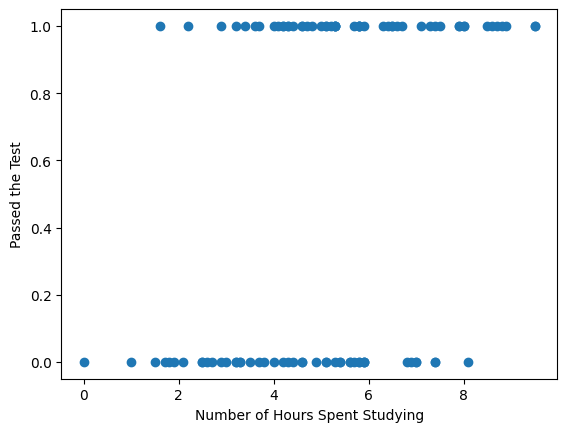

In [8]:
plt.scatter(
    df['Hours_Studied'],
    df['Pass']
)
plt.xlabel('Number of Hours Spent Studying')
plt.ylabel('Passed the Test')

Base on the above, it does seem to show that you are more likely to past the test if you study more but it's not conclusive as I think we can see a similar number of points in 4-5 hrs mark for passing or failing the test.

Text(0, 0.5, 'Passed the Test')

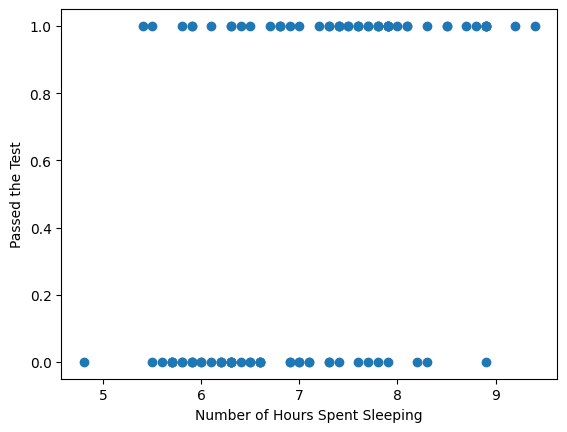

In [10]:
plt.scatter(
    df['Hours_Slept'],
    df['Pass']
)
plt.xlabel('Number of Hours Spent Sleeping')
plt.ylabel('Passed the Test')

Again, I don't think the data is showing something conclusive but we do see a bit more data points of students passing the more sleep they had. 

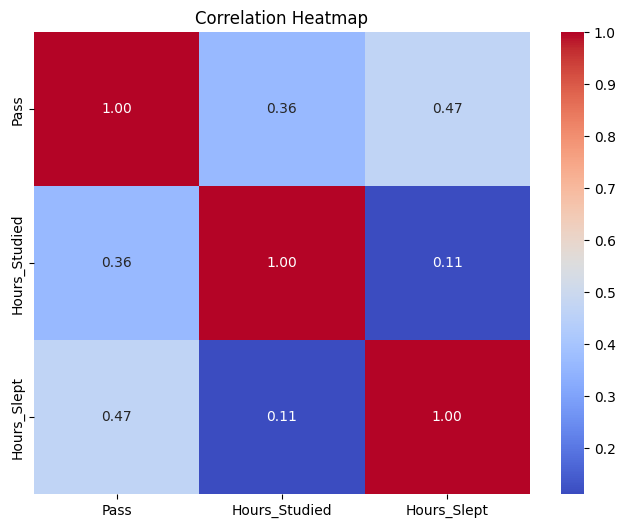

In [11]:
# plot a heatmap of correlations with seaborn 
correlation_data = df[['Pass', 'Hours_Studied', 'Hours_Slept']].corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Split the DataFrame into train and test data
---

In [12]:
# Split the data into train and test sets
train, test = train_test_split(
    df,
    random_state = 13 
)

In [13]:
train.shape

(75, 4)

In [14]:
train.head()

,Student,Hours_Studied,Hours_Slept,Pass
59,60,4.3,6.6,0
93,94,7.0,5.8,0
96,97,5.0,7.8,1
89,90,7.1,8.5,1
47,48,6.6,8.1,1


In [15]:
test.shape

(25, 4)

In [16]:
test.head()

,Student,Hours_Studied,Hours_Slept,Pass
37,38,7.4,6.8,1
62,63,3.4,7.9,1
83,84,1.9,4.8,0
14,15,5.9,6.7,1
43,44,8.9,7.6,1


## Train the model
---

In [18]:
# Identify dependent and independent variables
dependent_var = train['Pass']
independent_vars = train[['Hours_Studied', 'Hours_Slept']]
independent_vars = sm.add_constant(independent_vars)

In [19]:
# Build the model

model = sm.Logit(
    dependent_var,
    independent_vars
).fit()

Optimization terminated successfully.
         Current function value: 0.505466
         Iterations 6


In [20]:
# Print model summary statistics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.2699
Time:                        22:12:21   Log-Likelihood:                -37.910
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 8.183e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4435      2.443     -4.275      0.000     -15.231      -5.656
Hours_Studied     0.3491      0.164      2.125      0.034       0.027       0.671
Hours_Slept       1.2519      0.321      3.903      0.000       0.623       1.881
=================================================================================
"""

Overall all this is a good model and I have wrote my assessment below base on the model.summary()

#### Pseudo R-Squared
This measures the proportion of variances in the dependent variable as explained by the independent variable so a higher value indicates abetter fit. It's 0.2699 is still acceptable although we want this closer to 1, so I would say it's a moderate fit.

#### Log-likelihood
This measures how well the model fits the observed data and a higher value indicates a better fit. The value here is -37.910 is still okay, although not very high but within a reasonable range.

#### LLR p-value
We want a smaller p-value here and from what I see it's 8.183e-07 which is good. This suggests that the model is better than the null model.

#### Z-scores 
For Z-scores, we want anything more than 1.96 or less than 1.96. The Z-scores (-4.275 and 2.125) meets this which shows that it's strong and statistically significant to students passing the test. 

#### p-values
The p-values should ideally be less than 0.05 and we can see here both are under that for Hours_Studied and Hours_Slept. This does show it is statistically significant to students passing the test.

## Logit function
---

### Is the model a good fit?


To understand if a model can be used to make a prediction we need to look at additional elements of the Logit Regression results:
- **coef** : the coefficients of the independent variables in the regression equation.
<br>
- **Log-Likelihood** : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit. 
    - A higher (non-negative) number is better, but does not soley represent 'goodness of fit'.
<br>
- **LL-Null** : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
     - In general, a larger LL-Null value indicates a worse fit, while a smaller value indicates a better fit. But the meaningful interpretation lies in comparing the LL-Null value to the log-likelihood values of other models being considered.
<br>
- **Pseudo R-squ.** : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
     - These R-squared measures provide an indication of how much of the variation in the response variable is explained by the model. 

## Predict data for the test set and compare
---

In [21]:
# Predict the model results on the test data

predicted = model.predict(
    sm.add_constant(test[['Hours_Studied', 'Hours_Slept']])
)

In [22]:
# explore the predicted data

predicted.head(5)


37    0.657570
62    0.653231
83    0.022507
14    0.500922
43    0.898220
dtype: float64

In [23]:
# explore the test 'Pass' data

test['Pass'].head()

37    1
62    1
83    0
14    1
43    1
Name: Pass, dtype: int64

# Part 2 - Model Validation


## Validating our model
---
Validating a logistic regression model involves assessing how well the model fits the data and how well it can predict outcomes for new data. Here are some common methods for model validation:
- Confusion Matrix, True Positive and True Negative Rate
- Area Under the Curve (AUC)
- Receiver Operating Characteristic curve (ROC)


### Confusion Matrix

In [24]:
# We use 0.5 as the threshold
predicted_labels = predicted > 0.5  

# Generate confusion matrix
cm = metrics.confusion_matrix(test['Pass'], predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  5]
 [ 4 10]]


### True Positive Rate and True Negative Rate

In [25]:
# Calculate TPR and TNR
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print(TN)
print(FN)
print(FP)
print(TP)
print(f"True Positive Rate (TPR): {TPR}")
print(f"True Negative Rate (TNR): {TNR}")

6
4
5
10
True Positive Rate (TPR): 0.7142857142857143
True Negative Rate (TNR): 0.5454545454545454


THe TPR and TNR are okay meaning that the model is mostly able to correctly identify positive and negative instances in the dataset. But I think ideally the true negative rate is a bit low as 0.54 means it will get it wrong half of the time.

### AUC score

In [26]:
# Calculate the AUC Score

metrics.roc_auc_score(test['Pass'],predicted)

0.7857142857142857

THE ACU score here is good and closer to 1 so it does mean the model should be good at distinguishing between the positive and negative classes.

### ROC curve

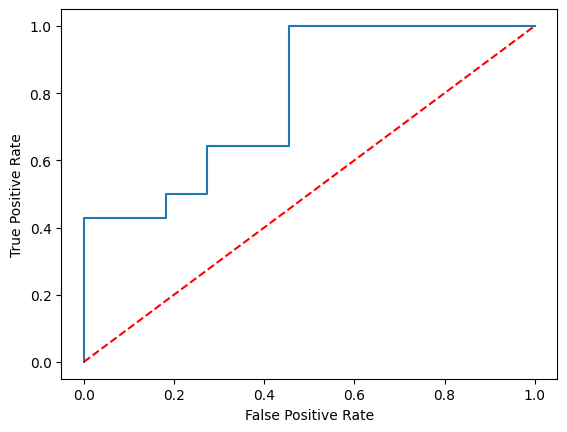

In [27]:
# Plot the ROC Curve

fpr, tpr, _ = metrics.roc_curve(test['Pass'],predicted)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

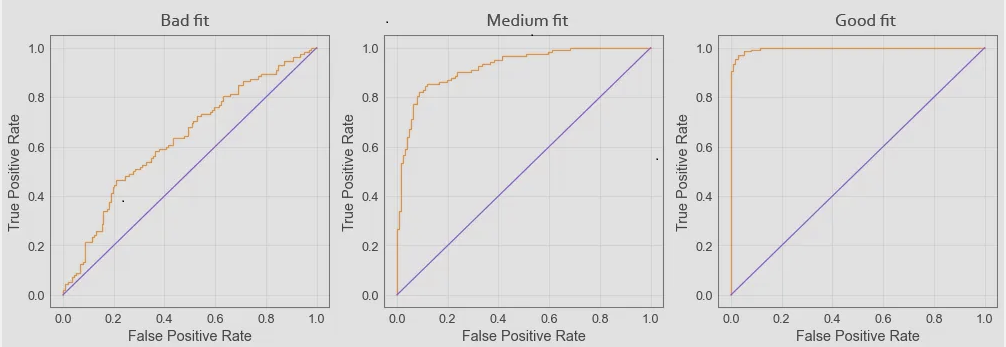

From this graph, it's considered a bit fit as it's very close to the diagonal line which means it's not performing much better than a random guess. There could bea number of factors like the amount of data we have here is small which is true 25 data points. Also possibly the factors we have chosen hours studied and hours slept. Hours Slept has a higher correlation so we. could take out the Hours Studied to see if this would be a better fit instead.

## Making a prediction
---
# calculate the log odds
logit = const + coef_studied * hours_studied + coef_slept * hours_slept

# transform the log odds into a probability
P = 1 / (1 + np.exp(-logit))


In [28]:
# Making a prediction, 
new_data = [[1, 7, 8]]  

# Make the prediction
predicted_values = model.predict(sm.add_constant(new_data))
predicted_values[0]

0.8823753980211199

Base on this prediction, the new student would probably pass the test but we should take into account some of the data we have seen from the scatter graphs earlier and the ROC curve this model has limitation and it may not be very accurate model to use to predict whether a student passes or fails. I also think there are other factors we need to consider i.e. whether or not student had enough drink/food or their emotional state i.e. if they felt stressed or relax before the test. The metrics we are using to predict if a student passes or fails is limited and I am apprehensive that this is a good model to use base on my domain knowledge.

For me, I would look at just the hours slept in making a logistic regression next time and see if this gives a better model fit. 